In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:

#last_row = session.query.order_by(Measurement.id.desc()).first()
last_row = session.query(Measurement).order_by(Measurement.id.desc()).first()
last_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22e1c09fcc0>,
 'prcp': 0.45,
 'id': 19550,
 'station': 'USC00516128',
 'tobs': 76.0,
 'date': '2017-08-23'}

# Exploratory Climate Analysis

2017-08-23
2016-08-23


Text(0, 0.5, 'Inches')

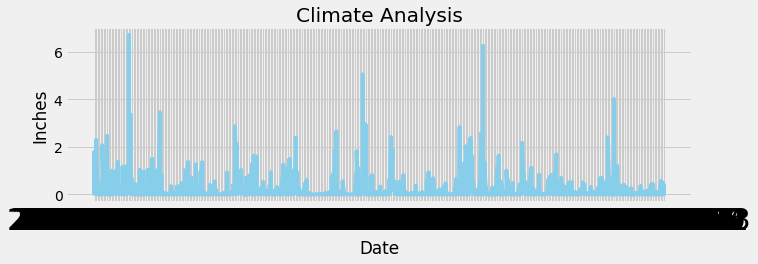

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
from datetime import datetime
current_date=last_row.date
print(current_date)
current_date_dt = datetime.strptime(current_date, '%Y-%m-%d').date()
current_date_dt

from dateutil.relativedelta import relativedelta
#import datetime
Date_One_Year_Ago= current_date_dt - relativedelta(years=1)

print(Date_One_Year_Ago)

# Perform a query to retrieve the data and precipitation scores

One_year_data = session.query(Measurement).filter(Measurement.date >= Date_One_Year_Ago )

from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
prcp_df = pd.DataFrame([(d.date, d.prcp) for d in One_year_data], 
                  columns=['Date', 'Precipitation']).sort_values('Date')
prcp_df

# # Save the query results as a Pandas DataFrame and set the index to the date column
new_prcp_df = prcp_df.set_index('Date')
new_prcp_df
 # Sort the dataframe by date
final_prcp_df=new_prcp_df.sort_index(axis = 0)
final_prcp_df
final_prcp_df.dropna(inplace=True)
final_prcp_df
# new_final_prcp_df=final_prcp_df.groupby("Date")["Precipitation"].mean().reset_index(name='AvgPrcp')
# new_final_prcp_df
# Use Pandas Plotting with Matplotlib to plot the data
x=final_prcp_df.index.values
y=final_prcp_df["Precipitation"]
#final_prcp_df.plot(kind='bar',color='skyblue',alpha=0.5, align="center")
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10,3)) 
#ax.bar(x, y,color='blue',alpha=0.5, align="center")
#plt.MaxNLocator(numticks=10)
#plt.locator_params(numticks=12)
#plt.set_major_locator(ticker.MaxNLocator(12))
#plt.locator_params(axis='x', nbins=10)
#plt.setp(ax.get_xticklabels(), rotation=180, ha='right')
#ax.xaxis.set_major_locator(mdates.MonthLocator()) 
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d')) 
#plt.xticks(np.arange(min(x), max(x), step=10))
#plt.gcf().autofmt_xdate()
#plt.style.use('ggplot')
#final_prcp_df.plot(kind='bar',color='skyblue')
plt.plot(x,y,color='skyblue')
#plt.gcf().autofmt_xdate()
ax.tick_params(axis="x", labelsize=30)
plt.title("Climate Analysis")
plt.xlabel("Date")
plt.ylabel("Inches")
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(5))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#plt.xticks(rotation=45)
#plt.show()


In [12]:
###### Use Pandas to calcualte the summary statistics for the precipitation 
final_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
last_row = session.query(Station).order_by(Station.id.desc()).first()
last_row.__dict__
Distinct_Stations = session.query(Measurement.station).distinct()
for station in Distinct_Stations:
    print(station)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Active_Stations=session.query(Measurement.station,func.count(Measurement.station).label("Count")).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for station in Active_Stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

Most_Active_Station=session.query(Measurement.station,func.count(Measurement.station).label("Count")).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
Most_Act_Station_Name=Most_Active_Station.station
Details=session.query(Measurement.station,Measurement.tobs).filter(Measurement.station==Most_Act_Station_Name)
Lowest_Temparature=session.query(func.min(Measurement.tobs).label('low_temp')).filter(Measurement.station==Most_Act_Station_Name)                               
Highest_Temparature=session.query(func.max(Measurement.tobs).label('max_temp')).filter(Measurement.station==Most_Act_Station_Name)                                                                
Average_Temparature=session.query(func.avg(Measurement.tobs).label('avg_temp')).filter(Measurement.station==Most_Act_Station_Name)  
#Average_Temparature=session.query(func.avg(Measurement.tobs).label('avg_temp')).filter(Measurement.station==Most_Act_Station_Name)
for temp in Lowest_Temparature:
    print(temp.low_temp)
for temp in Highest_Temparature:
    print(temp.max_temp)
for temp in Average_Temparature:
    print(temp.avg_temp)

54.0
85.0
71.66378066378067


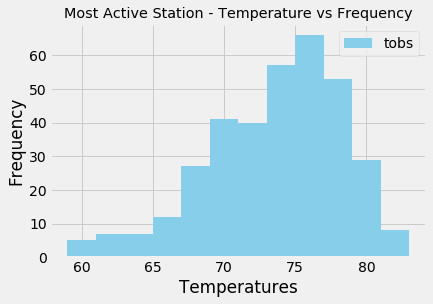

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Average_Temparature=session.query(func.avg(Measurement.tobs).label('avg_temp')).filter(Measurement.station==Most_Act_Station_Name)  

One_year_data_Act_Stn = session.query(Measurement.tobs).filter(Measurement.date >= Date_One_Year_Ago ).filter(Measurement.station==Most_Act_Station_Name)
tobs_df=pd.DataFrame([(d.tobs) for d in One_year_data_Act_Stn], 
                  columns=['TOBS'])
#tobs_df['Count']=1
#new_tobs_df = tobs_df.set_index('TOBS')
#new_tobs_df
# Sort the dataframe by date
#final_tobs_df=new_tobs_df.sort_index(axis = 0)
#final_tobs_df
#final_tobs_df.dropna(inplace=True)
#final_tobs_df
#new_final_tobs_df=final_tobs_df.groupby("TOBS")["Count"].sum().reset_index(name='Frequency')
#new_final_tobs_df
plt.hist(tobs_df["TOBS"],bins=12, color="skyblue")
plt.xlabel("Temperatures")
plt.ylabel("Frequency")
plt.legend(['tobs'])
plt.style.use('ggplot')
plt.title("Most Active Station - Temperature vs Frequency")
plt.show()

#new_tobs_df=tobs_df.groupby("TOBS").count().reset_index()
#new_tobs_df

## Bonus Challenge Assignment

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example

print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Trip Dates 2017-02-28 to 2017-03-05
#min_date = session.query(Measurement).order_by(Measurement.date.asc()).first()
#print(min_date.date)
Temp_Calc_df=pd.DataFrame()
Temp_Calc_df = pd.DataFrame(columns=("TripStart","TripEnd","TMIN","TAVG","TMAX"))
previous_years=[('2010-02-28','2010-03-05'),
               ('2011-02-28','2011-03-05'),
               ('2012-02-28','2012-03-05'),
               ('2013-02-28','2013-03-05'),
               ('2014-02-28','2014-03-05'),
               ('2015-02-28','2015-03-05'),
               ('2016-02-28','2016-03-05')]

for prev_year in previous_years:
    Temp_Calc=calc_temps(prev_year[0],prev_year[1])
    for TMP in Temp_Calc:
        Temp_Calc_df.loc[-1] = [prev_year[0],prev_year[1],TMP[0],TMP[1],TMP[2]]
        Temp_Calc_df.index = Temp_Calc_df.index + 1 
#Temp_Calc_df = Temp_Calc_df.sort_index()
Temp_Calc_df
Temp_Calc_df["P2P"]=Temp_Calc_df["TMAX"]-Temp_Calc_df["TMIN"]
# df['date'] = pd.to_datetime(df['date'])
Temp_Calc_df["date"]=pd.to_datetime(Temp_Calc_df['TripStart'])
Temp_Calc_df['year'] = Temp_Calc_df['date'].dt.year
Temp_Calc_df

,TripStart,TripEnd,TMIN,TAVG,TMAX,P2P,date,year
6,2010-02-28,2010-03-05,63.0,68.477273,73.0,10.0,2010-02-28,2010
5,2011-02-28,2011-03-05,61.0,69.755102,75.0,14.0,2011-02-28,2011
4,2012-02-28,2012-03-05,62.0,69.571429,74.0,12.0,2012-02-28,2012
3,2013-02-28,2013-03-05,60.0,70.159091,75.0,15.0,2013-02-28,2013
2,2014-02-28,2014-03-05,57.0,67.644444,76.0,19.0,2014-02-28,2014
1,2015-02-28,2015-03-05,65.0,71.590909,78.0,13.0,2015-02-28,2015
0,2016-02-28,2016-03-05,62.0,69.886364,80.0,18.0,2016-02-28,2016


No handles with labels found to put in legend.


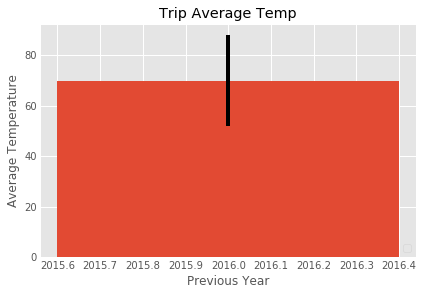

In [19]:
# only for prevous year 2016-02-28 to 2016-03-05

Temp_Calc_fil_df = Temp_Calc_df[Temp_Calc_df['year'] == 2016 ]
Temp_Calc_fil_df
x=Temp_Calc_fil_df["year"].to_list()
y=Temp_Calc_fil_df["TAVG"].to_list()
yerr=Temp_Calc_fil_df["P2P"].to_list()
# for row in Temp_Calc_fil_df:
#     print(row)
# #     x.append(temp["Year"])
# #     y.append(temp["TAVG"])
# #     yerr.append(temp["P2P"])
# # print(x)
# # print(y)
# # print(yerr)
        
#fig = plt.figure()
x = Temp_Calc_fil_df["year"]
y = Temp_Calc_fil_df["TAVG"]
yerr = Temp_Calc_fil_df["P2P"]

plt.bar(x, y, yerr=yerr )
plt.xlabel("Previous Year")
plt.ylabel("Average Temperature")
plt.legend(['P2P'])
#plt.style.use('ggplot')
plt.title("Trip Average Temp")

plt.legend(loc='lower right')

No handles with labels found to put in legend.


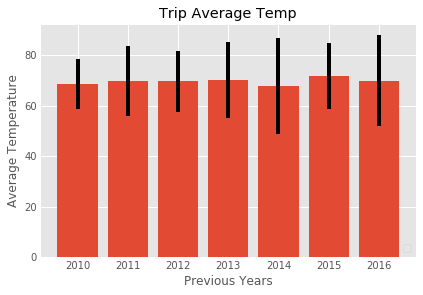

In [20]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig = plt.figure()
x = Temp_Calc_df["year"]
y = Temp_Calc_df["TAVG"]
yerr = Temp_Calc_df["P2P"]

plt.bar(x, y, yerr=yerr )
plt.xlabel("Previous Years")
plt.ylabel("Average Temperature")
plt.legend(['P2P'])
#plt.style.use('ggplot')
plt.title("Trip Average Temp")

plt.legend(loc='lower right')

In [21]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session = Session(engine)
Pre_Trip_Start='2016-02-28'
Pre_Trip_End='2016-03-05'
rainfall = session.query(Measurement.station,func.avg(Measurement.prcp)).filter(Measurement.station == Station.station)\
.filter(Measurement.date >= Pre_Trip_Start).filter(Measurement.date <=Pre_Trip_End).group_by(Measurement.station).all()
session.close()
rainfall

[('USC00513117', 0.0),
 ('USC00514830', 0.017142857142857144),
 ('USC00516128', 0.004),
 ('USC00517948', None),
 ('USC00519281', 0.0014285714285714286),
 ('USC00519397', 0.0),
 ('USC00519523', 0.047142857142857146)]

In [22]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [23]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
from datetime import datetime as dt
# Set the start and end date of the trip
trip_start_date='2017-02-20'
trip_end_date='2017-03-05'

# Use the start and end date to create a range of dates
mytripdates = pd.date_range(trip_start_date, trip_end_date).tolist()
mytripdates
mytruedates=[]
mymonthdaylist=[]
# Stip off the year and save a list of %m-%d strings
for date in mytripdates:
    new_date=date.strftime('%Y-%m-%d')
    mytruedates.append(new_date)
    stripped_date='{:%m-%d}'.format(dt.strptime(new_date, '%Y-%m-%d'))
    mymonthdaylist.append(stripped_date) 
mymonthdaylist
# Loop through the list of %m-%d strings and calculate the normals for each date

daily_normal_df=pd.DataFrame()
daily_normal_df = pd.DataFrame(columns=("TMIN","TAVG","TMAX"))

for monthday in mymonthdaylist:
    daily_normal=daily_normals(monthday)
    for TMP in daily_normal:
        daily_normal_df.loc[-1] = [TMP[0],TMP[1],TMP[2]]
        daily_normal_df.index = daily_normal_df.index + 1 
daily_normal_df = daily_normal_df.sort_index()
daily_normal_df


,TMIN,TAVG,TMAX
0,60.0,67.890909,76.0
1,57.0,69.272727,77.0
2,60.0,70.068966,78.0
3,61.0,70.366667,78.0
4,64.0,70.032787,76.0
5,65.0,70.655172,80.0
6,58.0,69.981481,77.0
7,62.0,69.892857,78.0
8,61.0,68.596491,76.0
9,61.0,68.566667,76.0


In [24]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
mytruedates
daily_normal_df["TripDate"]=mytruedates
daily_normal_df
new_daily_normal_df = daily_normal_df.set_index('TripDate')
new_daily_normal_df
 # Sort the dataframe by date
final_daily_normal_df=new_daily_normal_df.sort_index(axis = 0)
final_daily_normal_df

,TMIN,TAVG,TMAX
TripDate,,,
2017-02-20,60.0,67.890909,76.0
2017-02-21,57.0,69.272727,77.0
2017-02-22,60.0,70.068966,78.0
2017-02-23,61.0,70.366667,78.0
2017-02-24,64.0,70.032787,76.0
2017-02-25,65.0,70.655172,80.0
2017-02-26,58.0,69.981481,77.0
2017-02-27,62.0,69.892857,78.0
2017-02-28,61.0,68.596491,76.0


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text xticklabel objects>)

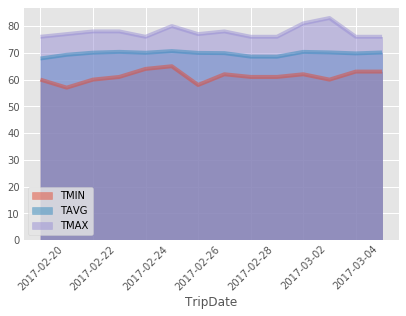

In [25]:
# Plot the daily normals as an area plot with `stacked=False` 
final_daily_normal_df.plot(kind='area',stacked=False)
plt.xticks(rotation=45)